An example of simple classification problem using a decision tree from sklearn. A set of Gaussian distributions is generated to simulate a simple separation of two classes using two features. Separate training and testing sets are generated to illustrate the concept of training and testing a learning algorithm.

In [1]:
#Based on examples from:
#   http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_twoclass.html
#   https://betatim.github.io/posts/sklearn-for-TMVA-users/
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;

from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles, make_classification
from sklearn.metrics import roc_curve, classification_report, roc_auc_score, auc
from sklearn.model_selection import train_test_split

import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

kw_args = dict()

# Construct dataset
X, y = make_classification(random_state=1, n_samples=1000, n_features=2, 
                           n_redundant=0, n_clusters_per_class=1, n_classes=2, 
                           n_informative=2, class_sep=0.5)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [2]:
bins = np.linspace(-7, 7, 35)
def show_feature(train_x, train_y, test_x, test_y, feature_index, feature_name):
    fig, (train_fig, test_fig) = plt.subplots(1, 2, figsize=(15, 5))
    #fig.suptitle('Two examples of different priors applied to the same Likelihood')
    plot_info = [(train_x, train_y, train_fig, 'Training'), (test_x, test_y, test_fig, 'Testing')]
    for xx, yy, f, lab in plot_info:
        kw_args = dict(bins=bins, alpha=0.5)
        f.hist(xx[yy==0,feature_index], label='Signal', color='coral', **kw_args)
        f.hist(xx[yy==1,feature_index], label='Background', color='navy', **kw_args)
        f.set_title(lab)
        plt.setp(f, xlabel=feature_name)
        plt.setp(f, ylabel='Events')
        f.legend()

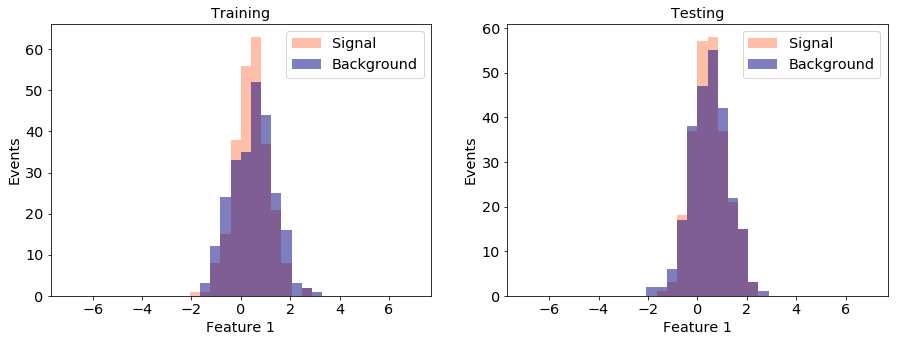

In [3]:
show_feature(X_train, y_train, X_test, y_test, 0, 'Feature 1')

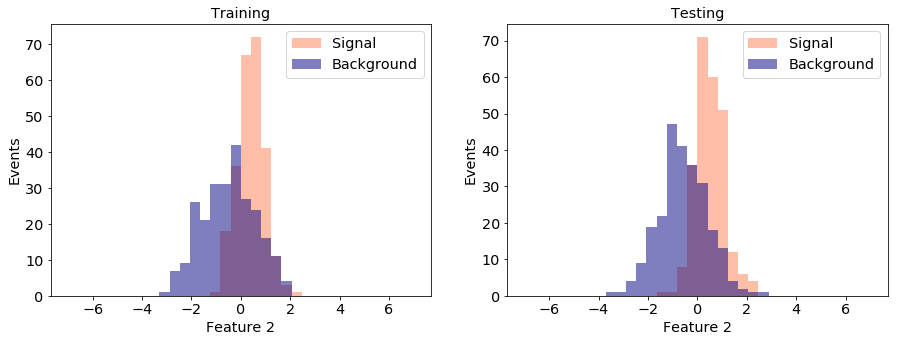

In [4]:
show_feature(X_train, y_train, X_test, y_test, 1, 'Feature 2')

In [5]:
def show_features(train_x, train_y, test_x, test_y, feature_indeces, feature_names):
    fig, (train_fig, test_fig) = plt.subplots(1, 2, figsize=(15, 5))
    #fig.suptitle('Two examples of different priors applied to the same Likelihood')
    plot_info = [(train_x, train_y, train_fig, 'Training'), (test_x, test_y, test_fig, 'Testing')]
    for xx, yy, f, lab in plot_info:
        cols = [('coral' if yy[i]==0 else 'navy') for i in range(len(yy))]
        f.scatter(xx[:, feature_indeces[0]], xx[:, feature_indeces[1]],  c=cols)
        f.set_title(lab)
        plt.setp(f, xlabel=feature_names[0])
        plt.setp(f, ylabel=feature_names[1])

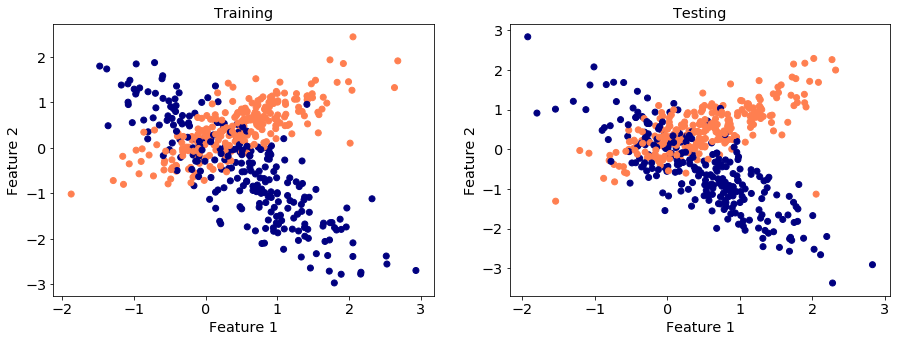

In [6]:
show_features(X_train, y_train, X_test, y_test, [0, 1], ['Feature 1', 'Feature 2'])

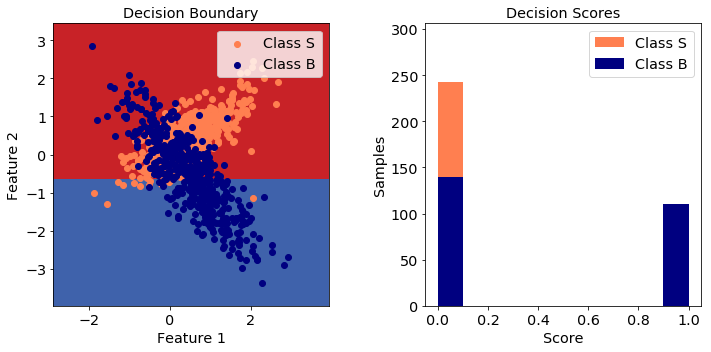

In [7]:
# Create and fit a decision tree
clf = DecisionTreeClassifier(max_depth=1)
clf.fit(X_train, y_train)

plot_colors = ['coral', 'navy']
plot_step = 0.02
class_names = "SB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')

# Plot the two-class decision scores
#twoclass_output = clf.decision_function(X)
twoclass_output = clf.predict(X_train)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y_train == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n)
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

In [8]:
y_predicted = clf.predict(X_test)
print(classification_report(y_test, y_predicted, target_names=["Background", "Signal"]))

              precision    recall  f1-score   support

  Background       0.65      0.98      0.78       250
      Signal       0.97      0.47      0.63       250

   micro avg       0.73      0.73      0.73       500
   macro avg       0.81      0.73      0.71       500
weighted avg       0.81      0.73      0.71       500

